In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ML_concat = pd.read_pickle('data/SS3_cast_UMIs_concat_ML.pkl')
ML_concat = ML_concat[ML_concat[1]][0]
c57_kon_UMI = pd.Series([gene[0] for gene in ML_concat], index=ML_concat.index)
c57_bs_UMI = pd.Series([gene[2]/gene[1] for gene in ML_concat], index=ML_concat.index)

In [3]:
data = pd.read_csv('data/SS3_cast_UMIs_concat.csv', index_col=0)

In [4]:
mean_data = data.reindex(ML_concat.index).mean(axis=1)

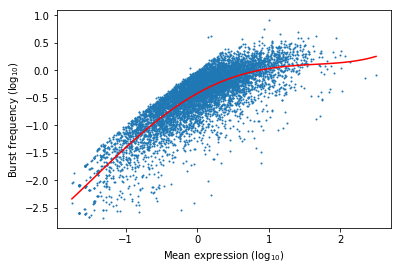

In [5]:
x = np.log10(mean_data.reindex(c57_kon_UMI.index).dropna())
y = np.log10(c57_kon_UMI[x.index])
plt.scatter(x,y, s=1)
weights = np.polyfit(x,y, 4)
model = np.poly1d(weights)
# Prediction on validation set
pred = model(x)
# We will plot the graph for 70 observations only
xp = np.linspace(x.min(),x.max(),70)
pred_plot = model(xp)
plt.plot(xp, pred_plot, c='red')
plt.xlabel('Mean expression (log$_{10}$)')
plt.ylabel('Burst frequency (log$_{10}$)')
plt.savefig('figures/ExtDataFig1g.pdf')
plt.show()

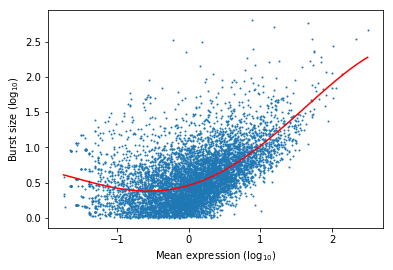

In [6]:
x = np.log10(mean_data.reindex(c57_bs_UMI.index).dropna())
y = np.log10(c57_bs_UMI[x.index])
plt.scatter(x,y, s=1)
weights = np.polyfit(x,y, 4)
model = np.poly1d(weights)
# Prediction on validation set
pred = model(x)
# We will plot the graph for 70 observations only
xp = np.linspace(x.min(),x.max(),70)
pred_plot = model(xp)
plt.plot(xp, pred_plot, c = 'red')
plt.xlabel('Mean expression (log$_{10}$)')
plt.ylabel('Burst size (log$_{10}$)')
plt.savefig('figures/ExtDataFig1h.pdf')
plt.show()